In [1]:
import matplotlib.pyplot as plt
from math import log10
%matplotlib inline

import pandas as pds
import json

In [6]:
results = json.load(open("chrono_bench.json"))

In [3]:
benchmakrs=pds.DataFrame(results["benchmarks"])
scalar=benchmakrs[benchmakrs.name.str.contains("scalar")]
avx=benchmakrs[benchmakrs.name.str.contains("vectorized")]
mixed=benchmakrs[benchmakrs.name.str.contains("entry_point")]

[]

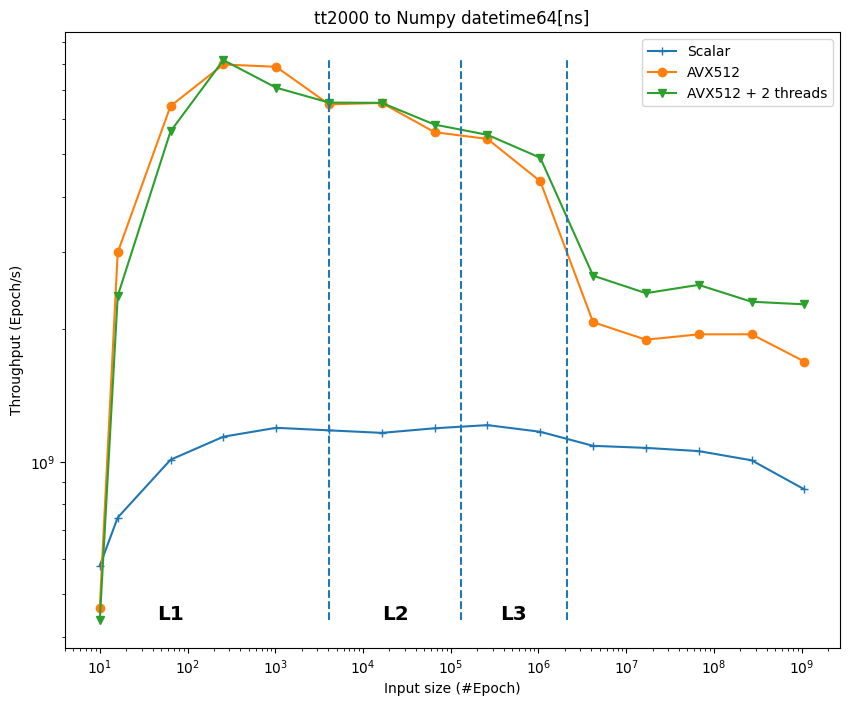

In [4]:
vmin=min(benchmakrs.epochs_per_second)
vmax=max(benchmakrs.epochs_per_second)
f=plt.figure(figsize=(10,8))
plt.title("tt2000 to Numpy datetime64[ns]")
ax=plt.subplot()
scalar.plot(x="Epochs", y="epochs_per_second", ax=ax, marker="+")
avx.plot(x="Epochs", y="epochs_per_second", ax=ax, marker="o")
mixed.plot(x="Epochs", y="epochs_per_second", ax=ax, marker="v")

last_cache_size=1
for cache in results['context']["caches"]:
    if cache["type"] in ('Data','Unified'):
        size = cache['size']/8
        name = f"L{cache['level']}"
        ax.vlines(size, vmin, vmax, label=name, linestyles="dashed")
        mid = 10**((log10(size)+log10(last_cache_size))/2)
        ax.text(mid, vmin, name, fontweight='heavy', fontsize="x-large", horizontalalignment="center")
        last_cache_size = size

ax.legend([
    "Scalar",
    "AVX512",
    "AVX512 + 2 threads"
])

plt.ylabel("Throughput (Epoch/s)")
plt.xlabel("Input size (#Epoch)")

plt.loglog()

[]

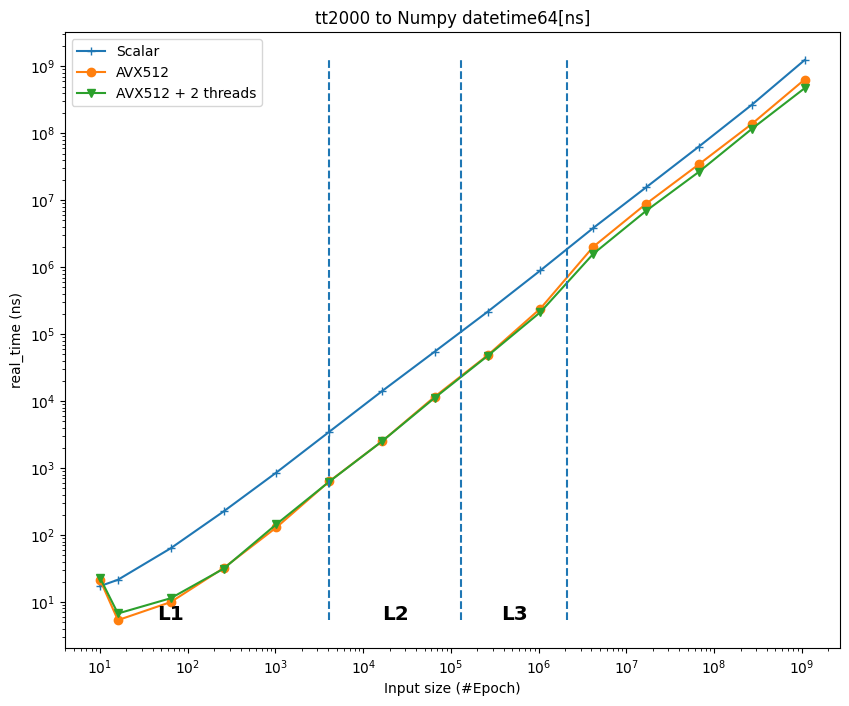

In [12]:
vmin=min(benchmakrs.real_time)
vmax=max(benchmakrs.real_time)
f=plt.figure(figsize=(10,8))
plt.title("tt2000 to Numpy datetime64[ns]")
ax=plt.subplot()
scalar.plot(x="Epochs", y="real_time", ax=ax, marker="+")
avx.plot(x="Epochs", y="real_time", ax=ax, marker="o")
mixed.plot(x="Epochs", y="real_time", ax=ax, marker="v")

last_cache_size=1
for cache in results['context']["caches"]:
    if cache["type"] in ('Data','Unified'):
        size = cache['size']/8
        name = f"L{cache['level']}"
        ax.vlines(size, vmin, vmax, label=name, linestyles="dashed")
        mid = 10**((log10(size)+log10(last_cache_size))/2)
        ax.text(mid, vmin, name, fontweight='heavy', fontsize="x-large", horizontalalignment="center")
        last_cache_size = size

ax.legend([
    "Scalar",
    "AVX512",
    "AVX512 + 2 threads"
])

plt.ylabel("real_time (ns)")
plt.xlabel("Input size (#Epoch)")

plt.loglog()